In [1]:
from cs103 import *
from typing import NamedTuple, List
import csv

CountryEmission = NamedTuple("CountryEmission",[('name',str),
                                                ('co2_emission_per_capita',float),
                                                ('life_expectancy',float)])

#interp. contry's name, CO2 Emission Per Capita, life expectancy of the Country (2016)
Australia = CountryEmission("Australia",17.1,82.959)
Austria = CountryEmission("Austria",8.43,81.258)
Belgium = CountryEmission("Belgium",8.34,81.139)

Canada = CountryEmission("Canada",18.58,82.117)
Finland = CountryEmission("Finland",9.31,81.382)
France = CountryEmission("France",5.13,82.328)
Germany = CountryEmission("Germany",9.44,80.902)
Italy = CountryEmission("Italy",5.9,83.008)

Japan = CountryEmission("Japan",9.7,84.09)
UnitedKingdom = CountryEmission("United Kingdom",5.55,81.111)
UnitedStates = CountryEmission("United States",15.52,78.885)

@typecheck
#template based on compound(3 fields)
def fn_for_country_emission(ce: CountryEmission)->...:
    return ...,(ce.name,
                ce.co2_emission_per_capita,
                ce.life_expectancy)

# List[CountryEmission]
# interp. a list of CountryEmission

LOCE0 = []
LOCE1 = [Australia,Austria,Belgium,Canada]
LOCE2 = [Finland,France,Germany,Italy]
LOCE3 = [Japan,UnitedKingdom,UnitedStates]

@typecheck
#template based on arbitrary-sized, and the reference rule
def fn_for_loce(loce: List[CountryEmission]) -> ...:
    #description for accumulator
    acc = ... #type:...
    for ce in loce:
        acc = ...,(fn_for_country_emission(ce),acc)
    return ...,(acc)

In [2]:
@typecheck
def read(filename: str) -> List[CountryEmission]:
    """    
    reads information from the specified file and returns a list of CountryEmission
    """
    #return [] 
    # Template from HtDAP
    # loc contains the result so far
    loce = [] # type: List[CountryEmission]

    with open(filename) as csvfile:
        
        reader = csv.reader(csvfile)
        next(reader)

        for row in reader:
            ce = CountryEmission(row[0],parse_float(row[4]),parse_float(row[6]))
            loce.append(ce)
            
    return loce

In [3]:
@typecheck
def emission(ce:CountryEmission) -> float:
    """
    enter a CountryEmission, return ce.co2_emission_per_capita
    """
    #return 0.0
    #template from CountryEmission
    return ce.co2_emission_per_capita

start_testing()
expect(emission(Australia),17.1)
expect(emission(Austria),8.43)
expect(emission(Belgium),8.34)
summary()

3 of 3 tests passed


In [4]:
@typecheck
def life_expe(ce:CountryEmission) -> float:
    """
    enter a CountryEmission, return ce.life_expectancy
    """
    #return 0.0
    #template from CountryEmission
    return ce.life_expectancy

start_testing()
expect(life_expe(Canada),82.117)
expect(life_expe(Finland),81.382)
expect(life_expe(France),82.328)
summary()

3 of 3 tests passed


In [5]:
@typecheck
def list_emission(loce:List[CountryEmission]) -> List[float]:
    """
    enter a list of CountryEmission, return a list of ce.co2_emission_per_capita
    """
    #return []
    #template from List[CountryEmission]
    #template based on arbitrary-sized, and the reference rule
    #acc contains all data about ce.co2_emission_per_capita
    acc = [] #type:list
    for ce in loce:
        acc.append(emission(ce))
    return acc

start_testing()
expect(list_emission(LOCE1),[17.1, 8.43, 8.34, 18.58])
expect(list_emission(LOCE2),[9.31, 5.13, 9.44, 5.9])
expect(list_emission(LOCE3),[9.7, 5.55, 15.52])
summary()

3 of 3 tests passed


In [6]:
@typecheck
def list_life_expe(loce:List[CountryEmission]) -> List[float]:
    """
    enter a list of CountryEmission, return a list of ce.life_expectancy
    """
    #return []
    #template from List[CountryEmission]
    #template based on arbitrary-sized, and the reference rule
    #acc contains all data about ce.life_expectancy
    acc = [] #type:list
    for ce in loce:
        acc.append(life_expe(ce))
    return acc

start_testing()
expect(list_life_expe(LOCE1),[82.959, 81.258, 81.139, 82.117])
expect(list_life_expe(LOCE2),[81.382, 82.328, 80.902, 83.008])
expect(list_life_expe(LOCE3),[84.09, 81.111, 78.885])
summary()

3 of 3 tests passed


In [7]:
import matplotlib.pyplot as plt
import numpy as np

@typecheck
def shaw_scatter_plot(loce:List[CountryEmission]) -> None:
    x = np.array(list_life_expe(loce))
    y = np.array(list_emission(loce))
    
    m, b = np.polyfit(x, y, 1)
    plt.plot(x, m*x + b, "#FFB740", linewidth = '4')
    
    font1 = {'size':15}
    font2 = {'size':12}
    
    plt.title("The Correlation between Life Expectancy and CO2 Emissions per Capital",fontdict = font1)
    plt.xlabel("Life Expectancy",fontdict = font2)
    plt.ylabel("CO2 Emissions per Capital",fontdict = font2)

    plt.scatter(x, y, color="#A2DBFA")

    plt.show()

In [8]:
@typecheck
def main(filename: str) ->None:
    """
    Reads the file from given filename, analyzes the data,
    returns the result
    """
    # Template from HtDAP, based on composition
    return shaw_scatter_plot(read(filename))

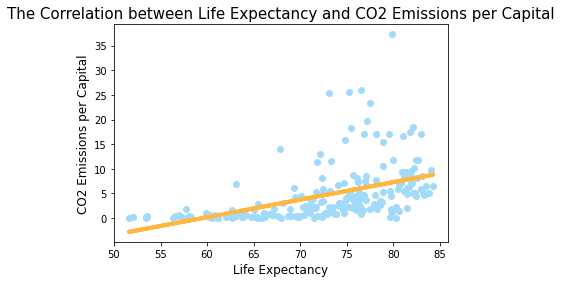

In [9]:
main('CO2Emission_LifeExp.csv')

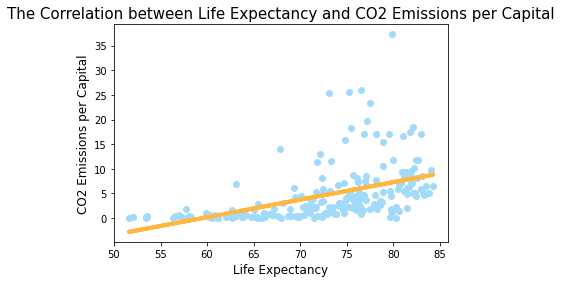

10 of 10 tests passed


In [10]:
start_testing()

# Examples and tests for main
expect(main('CO2Emission_LifeExp.csv'),None)

# Examples and tests for read
expect(read('CO2Emission_LifeExp-test1.csv'),LOCE1)
expect(read('CO2Emission_LifeExp-test2.csv'),LOCE2)
expect(read('CO2Emission_LifeExp-test3.csv'),LOCE3)

# Examples and tests for analyze1
expect(list_emission(LOCE1),[17.1, 8.43, 8.34, 18.58])
expect(list_emission(LOCE2),[9.31, 5.13, 9.44, 5.9])
expect(list_emission(LOCE3),[9.7, 5.55, 15.52])

# Examples and tests for analyze2
expect(list_life_expe(LOCE1),[82.959, 81.258, 81.139, 82.117])
expect(list_life_expe(LOCE2),[81.382, 82.328, 80.902, 83.008])
expect(list_life_expe(LOCE3),[84.09, 81.111, 78.885])

summary()